# Road Accident Analysis and Prediction

This comprehensive dataset provides detailed information on road accidents reported over multiple years. The dataset encompasses various attributes related to accident status, vehicle and casualty references, demographics, and severity of casualties. It includes essential factors such as pedestrian details, casualty types, road maintenance worker involvement, and the Index of Multiple Deprivation (IMD) decile for casualties' home areas.

The dataset is provided by the UK Department for Transport and is updated annually. It is a valuable resource for understanding the causes and effects of road accidents and for developing strategies to prevent them.

In this notebook, we will perform an exploratory data analysis (EDA) to understand the dataset's structure and contents. We will also build a machine learning model to predict the severity of road accidents based on various attributes.

At the end we will suggest some strategies to prevent road accidents based on the insights gained from the analysis.

### Importing Libraries


In [1]:
import warnings 
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score




## Load the Data

In [2]:
df = pd.read_csv("dataset/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022 (1).csv").drop_duplicates()
print(f'shape of dataset is {df.shape}')
df.head().T

shape of dataset is (61352, 20)


,0,1,2,3,4
status,Unvalidated,Unvalidated,Unvalidated,Unvalidated,Unvalidated
accident_index,2022070151244,2022070152668,2022070154696,2022070154696,2022070154696
accident_year,2022,2022,2022,2022,2022
accident_reference,070151244,070152668,070154696,070154696,070154696
vehicle_reference,2,1,1,2,3
casualty_reference,1,1,1,3,2
casualty_class,1,1,1,1,1
sex_of_casualty,2,1,2,2,1
age_of_casualty,46,30,58,78,63
age_band_of_casualty,8,6,9,11,9


**Columns**:



**Status**: The status of the accident (e.g., reported, under investigation).

**Accident_Index**: A unique identifier for each reported accident.

**Accident_Year**: The year in which the accident occurred.

**Accident_Reference**: A reference number associated with the accident.

**Vehicle_Reference**: A reference number for the involved vehicle in the accident.

**Casualty_Reference**: A reference number for the casualty involved in the accident.

**Casualty_Class**: Indicates the class of the casualty (e.g., driver, passenger, pedestrian).

**Sex_of_Casualty**: The gender of the casualty (male or female).

**Age_of_Casualty**: The age of the casualty.

**Age_Band_of_Casualty**: Age group to which the casualty belongs (e.g., 0-5, 6-10, 11-15).

**Casualty_Severity**: The severity of the casualty's injuries (e.g., fatal, serious, slight).

**Pedestrian_Location**: The location of the pedestrian at the time of the accident.

**Pedestrian_Movement**: The movement of the pedestrian during the accident.

**Car_Passenger**: Indicates whether the casualty was a car passenger at the time of the accident (yes or no).

**Bus_or_Coach_Passenger**: Indicates whether the casualty was a bus or coach passenger (yes or no).

**Pedestrian_Road_Maintenance_Worker**: Indicates whether the casualty was a road maintenance worker (yes or no).

**Casualty_Type**: The type of casualty (e.g., driver/rider, passenger, pedestrian).

**Casualty_Home_Area_Type**: The type of area in which the casualty resides (e.g., urban, rural).

**Casualty_IMD_Decile**: The IMD decile of the area where the casualty resides (a measure of deprivation).

**LSOA_of_Casualty**: The Lower Layer Super Output Area (LSOA) associated with the casualty's location.

## Data Preprocessing

In [3]:
# Check for missing values
df.isnull().sum()

status                                0
accident_index                        0
accident_year                         0
accident_reference                    0
vehicle_reference                     0
casualty_reference                    0
casualty_class                        0
sex_of_casualty                       0
age_of_casualty                       0
age_band_of_casualty                  0
casualty_severity                     0
pedestrian_location                   0
pedestrian_movement                   0
car_passenger                         0
bus_or_coach_passenger                0
pedestrian_road_maintenance_worker    0
casualty_type                         0
casualty_home_area_type               0
casualty_imd_decile                   0
lsoa_of_casualty                      0
dtype: int64

In [4]:
(df["status"]=="Unvalidated").value_counts()
# Remove the unvalidated data
df.drop(columns=['status','accident_index','accident_reference', 'accident_year', 'lsoa_of_casualty'], inplace=True)


In [5]:
# Drop rows with missing values (-1)
df.replace(-1, np.nan, inplace=True)
df.dropna(inplace=True)
# Convert all columns to int
df = df.astype(int)
df

,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,2,1,1,2,46,8,3,0,0,0,0,0,9,1,9
1,1,1,1,1,30,6,3,0,0,0,0,0,9,1,2
2,1,1,1,2,58,9,3,0,0,0,0,0,9,1,10
3,2,3,1,2,78,11,3,0,0,0,0,0,9,2,10
4,3,2,1,1,63,9,3,0,0,0,0,0,9,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61346,1,1,1,1,69,10,2,0,0,0,0,0,4,1,7
61347,1,1,3,2,56,9,3,10,9,0,0,0,0,1,10
61349,2,1,1,1,42,7,3,0,0,0,0,0,9,1,5
61350,1,1,1,2,40,7,3,0,0,0,0,0,9,1,3


## Descriptive Statistics

In [6]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
vehicle_reference,54287.0,1.453589,1.160362,1.0,1.0,1.0,2.0,227.0
casualty_reference,54287.0,1.312543,0.981426,1.0,1.0,1.0,1.0,148.0
casualty_class,54287.0,1.454473,0.728866,1.0,1.0,1.0,2.0,3.0
sex_of_casualty,54287.0,1.384936,0.492904,1.0,1.0,1.0,2.0,9.0
age_of_casualty,54287.0,37.754103,18.926403,0.0,23.0,35.0,51.0,101.0
age_band_of_casualty,54287.0,6.483044,2.220784,1.0,5.0,6.0,8.0,11.0
casualty_severity,54287.0,2.782563,0.440870,1.0,3.0,3.0,3.0,3.0
pedestrian_location,54287.0,0.773942,2.159365,0.0,0.0,0.0,0.0,10.0
pedestrian_movement,54287.0,0.624735,1.976686,0.0,0.0,0.0,0.0,9.0
car_passenger,54287.0,0.204340,0.543612,0.0,0.0,0.0,0.0,9.0


In [7]:
# Load excel file
df_info = pd.read_excel("dataset/dft_road_casualty_statistics_road_safety_open_dataset_data_guide.xlsx")
df_info.head()

,table,field name,code/format,label,note
0,Accident,collision_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,collision_year,NaN,NaN,NaN
2,Accident,collision_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
4,Accident,accident_year,NaN,NaN,NaN


In [8]:
# Select where coulumn table is equal to casualty
df_info = df_info[df_info['table']=='Casualty']
df_info

,table,field name,code/format,label,note
1614,Casualty,collision_index,NaN,NaN,NaN
1615,Casualty,collision_year,NaN,NaN,NaN
1616,Casualty,collision_reference,NaN,NaN,NaN
1617,Casualty,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1618,Casualty,accident_year,NaN,NaN,NaN
...,...,...,...,...,...
1728,Casualty,casualty_home_area_type,1,Urban area,field introduced in 1999
1729,Casualty,casualty_home_area_type,2,Small town,field introduced in 1999
1730,Casualty,casualty_home_area_type,3,Rural,field introduced in 1999
1731,Casualty,casualty_home_area_type,-1,Data missing or out of range,field introduced in 1999


In [9]:
# For each column in the dataset, get the description from the data guide
col_desc = {}
for col in df.columns:
    col_info = df_info[df_info['field name']==col]
    if len(col_info) > 2:
        # Make key value based on 'code/format' and 'label'
        dic = col_info[['code/format', 'label']].set_index('code/format').to_dict()['label']
        col_desc[col] = dic
    else:
        col_desc[col] = 'No description found'
    print(f'{col}: {col_desc[col]}')

vehicle_reference: No description found
casualty_reference: No description found
casualty_class: {1: 'Driver or rider', 2: 'Passenger', 3: 'Pedestrian'}
sex_of_casualty: {1: 'Male', 2: 'Female', 9: 'unknown (self reported)', -1: 'Data missing or out of range'}
age_of_casualty: No description found
age_band_of_casualty: {1: '0 - 5', 2: '6 - 10', 3: '11 - 15', 4: '16 - 20', 5: '21 - 25', 6: '26 - 35', 7: '36 - 45', 8: '46 - 55', 9: '56 - 65', 10: '66 - 75', 11: 'Over 75', -1: 'Data missing or out of range'}
casualty_severity: {1: 'Fatal', 2: 'Serious', 3: 'Slight'}
pedestrian_location: {0: 'Not a Pedestrian', 1: 'Crossing on pedestrian crossing facility', 2: 'Crossing in zig-zag approach lines', 3: 'Crossing in zig-zag exit lines', 4: 'Crossing elsewhere within 50m. of pedestrian crossing', 5: 'In carriageway, crossing elsewhere', 6: 'On footway or verge', 7: 'On refuge, central island or central reservation', 8: 'In centre of carriageway - not on refuge, island or central reservation', 

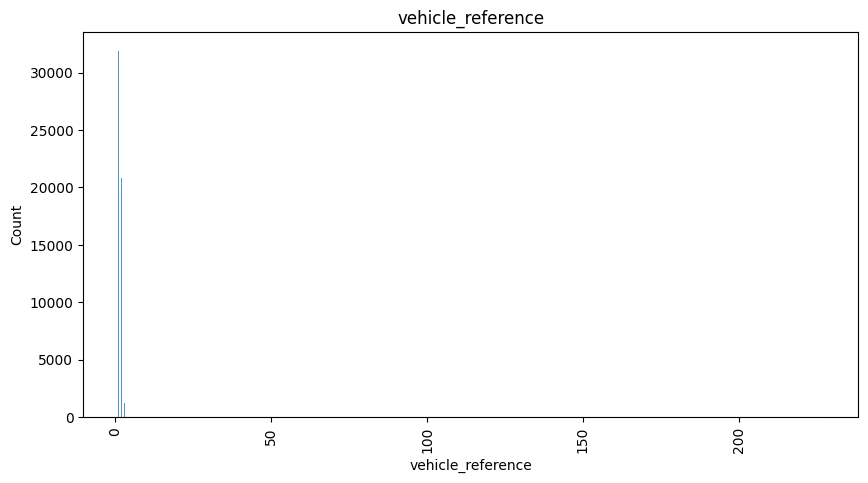

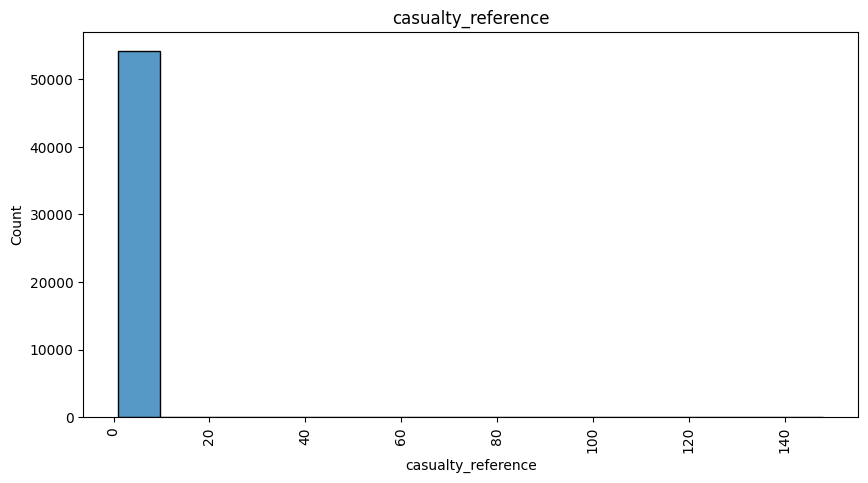

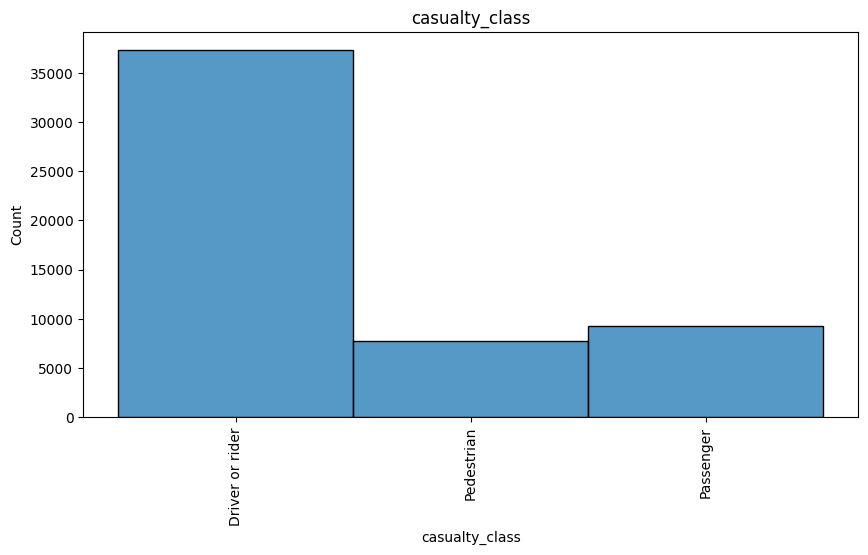

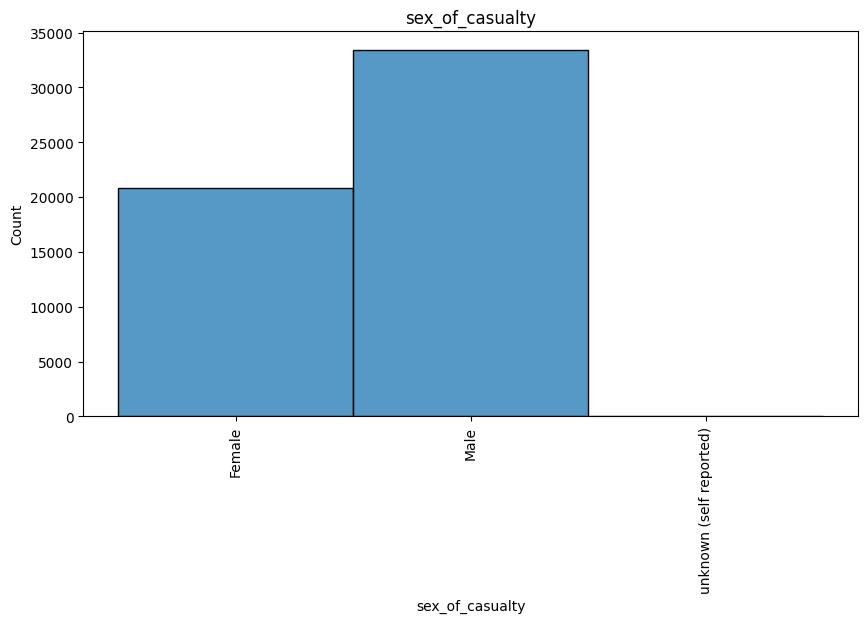

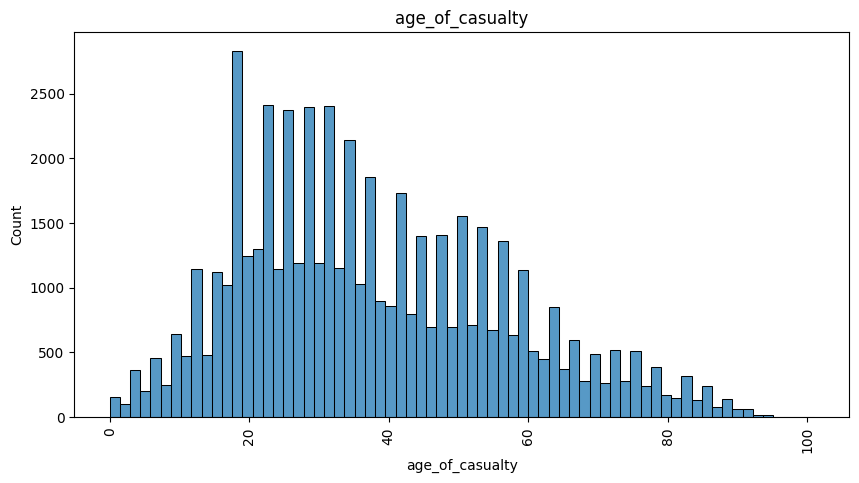

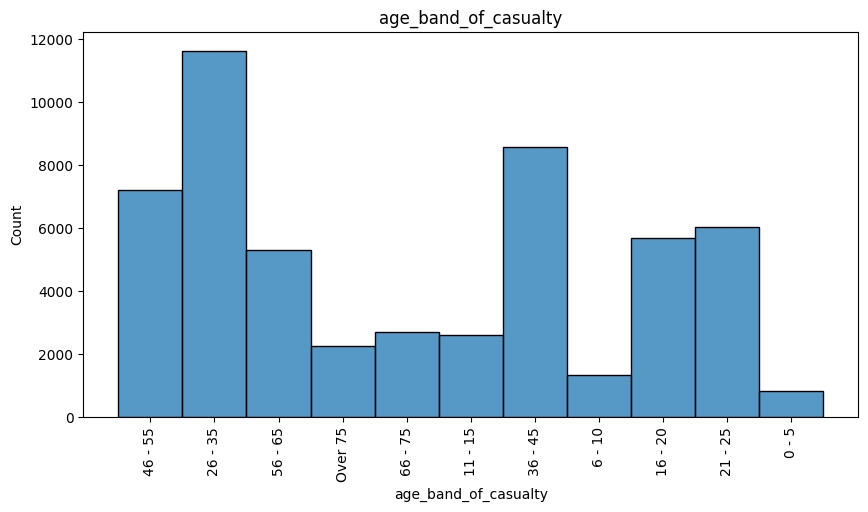

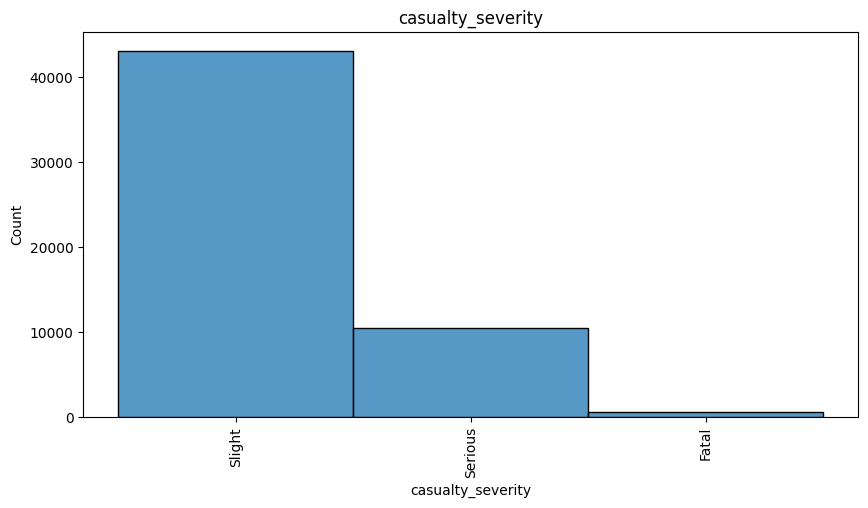

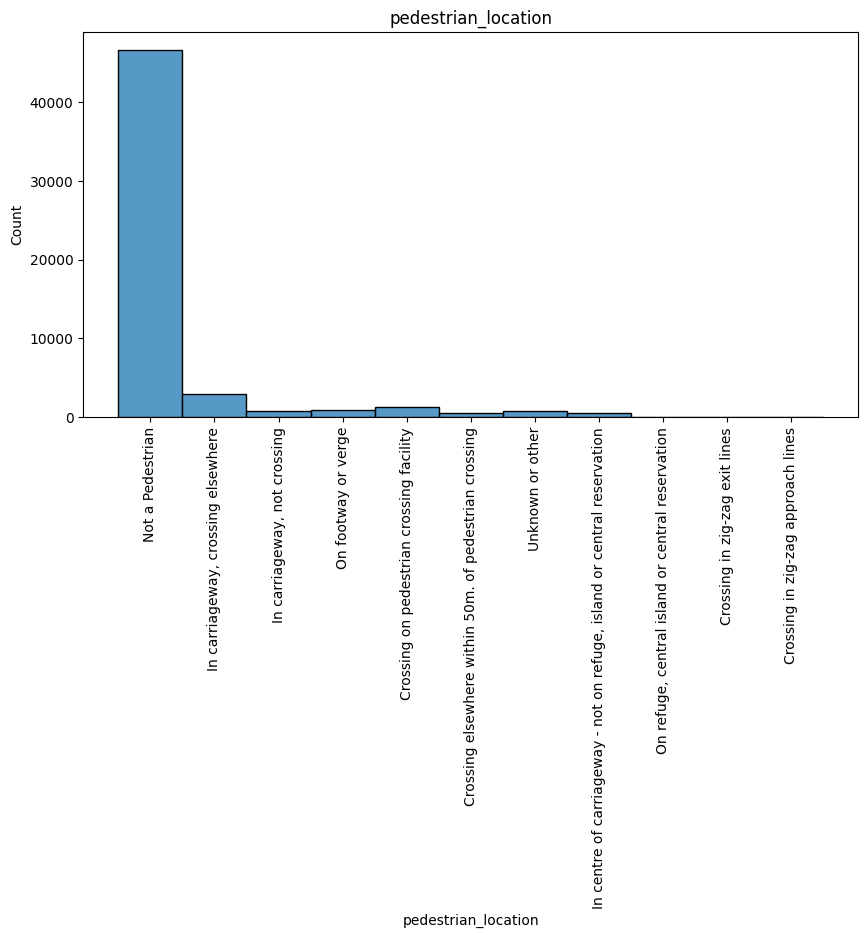

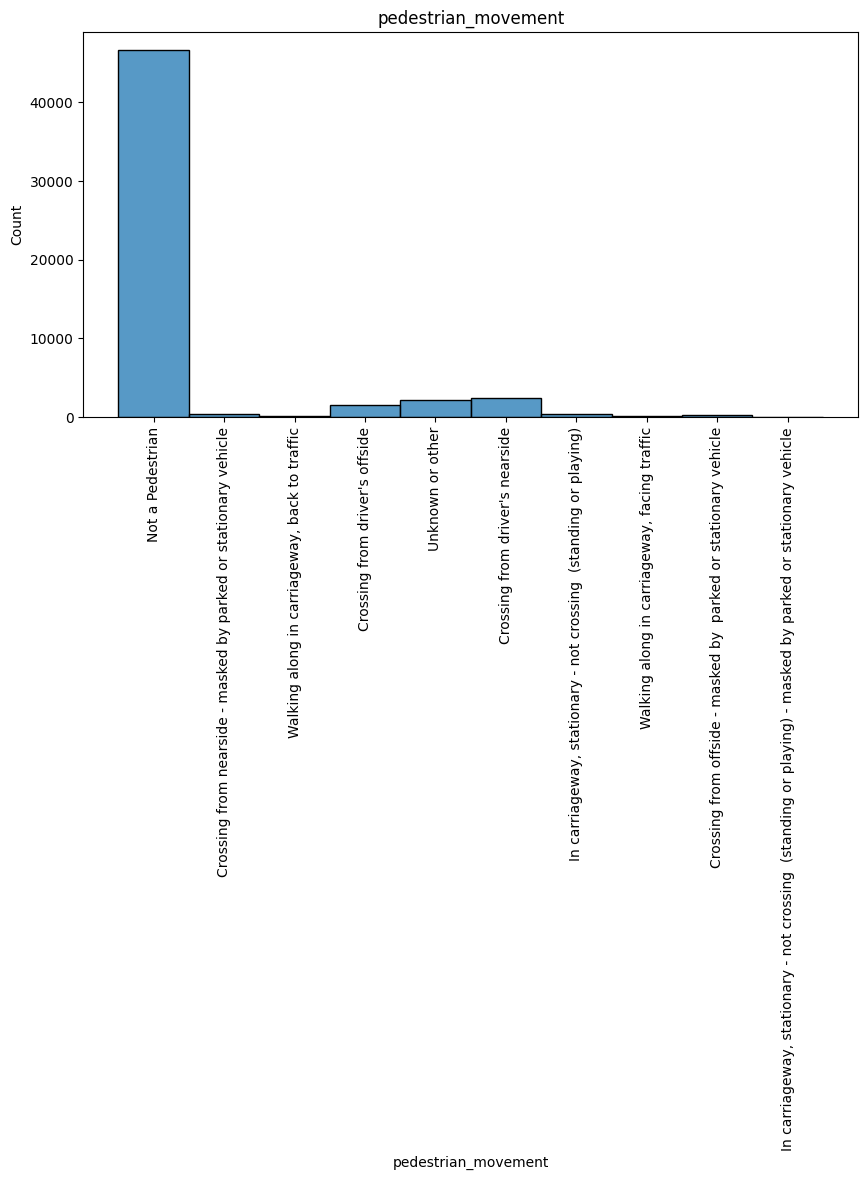

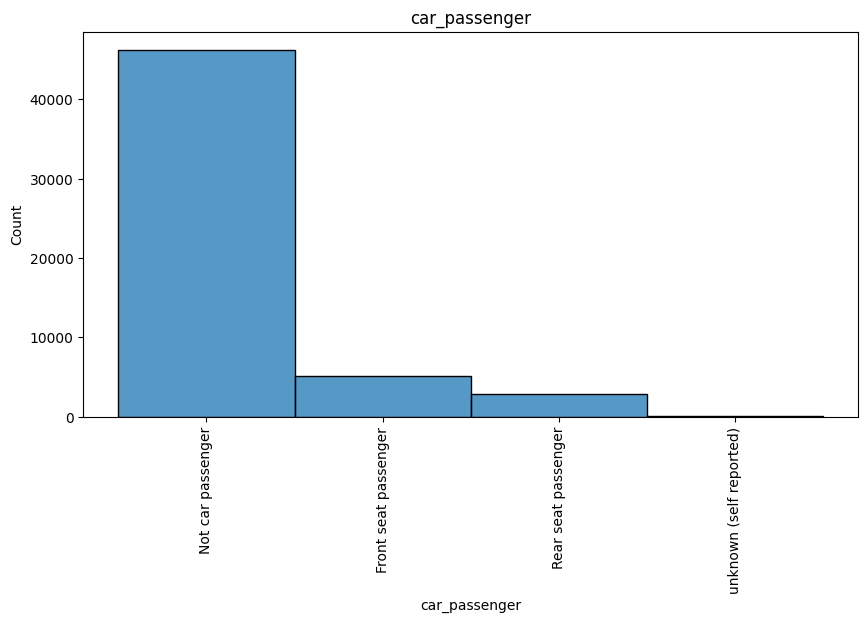

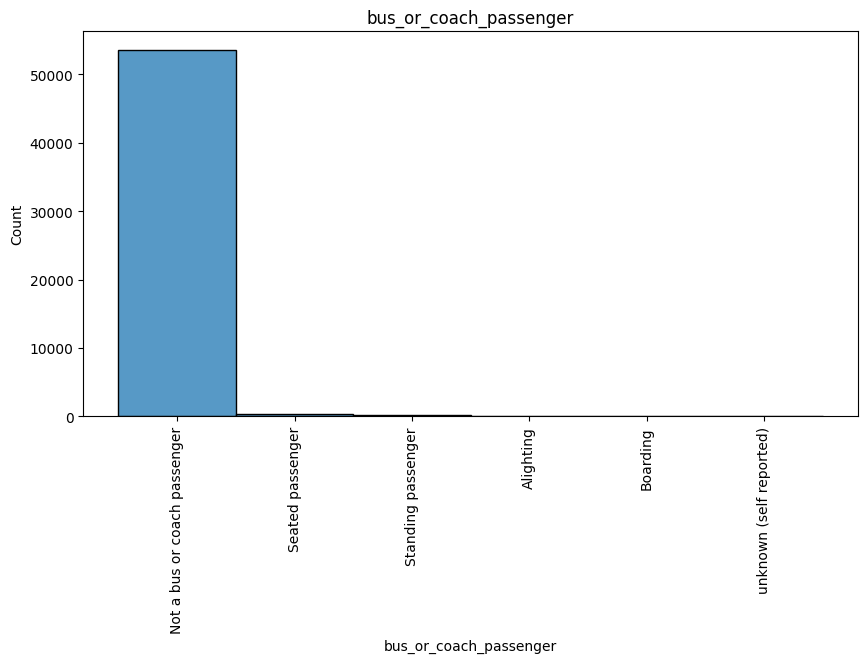

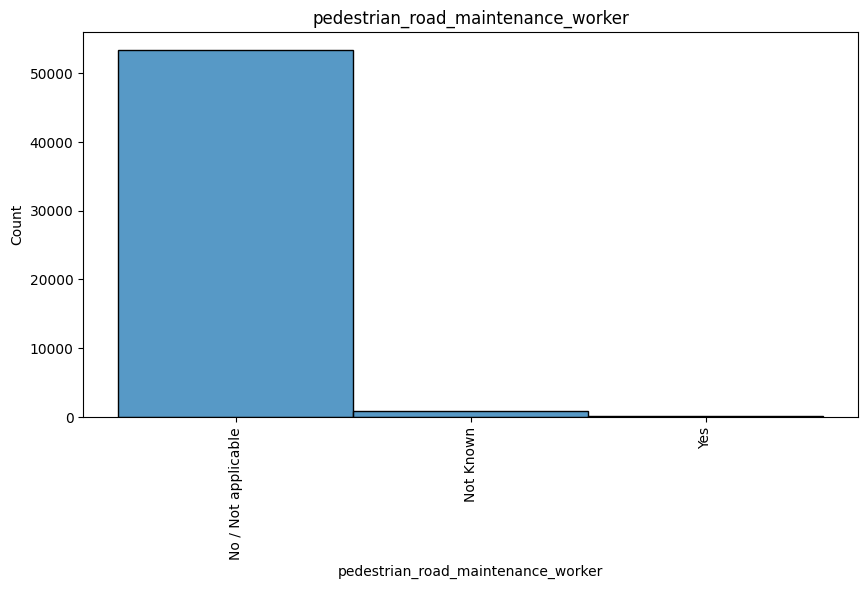

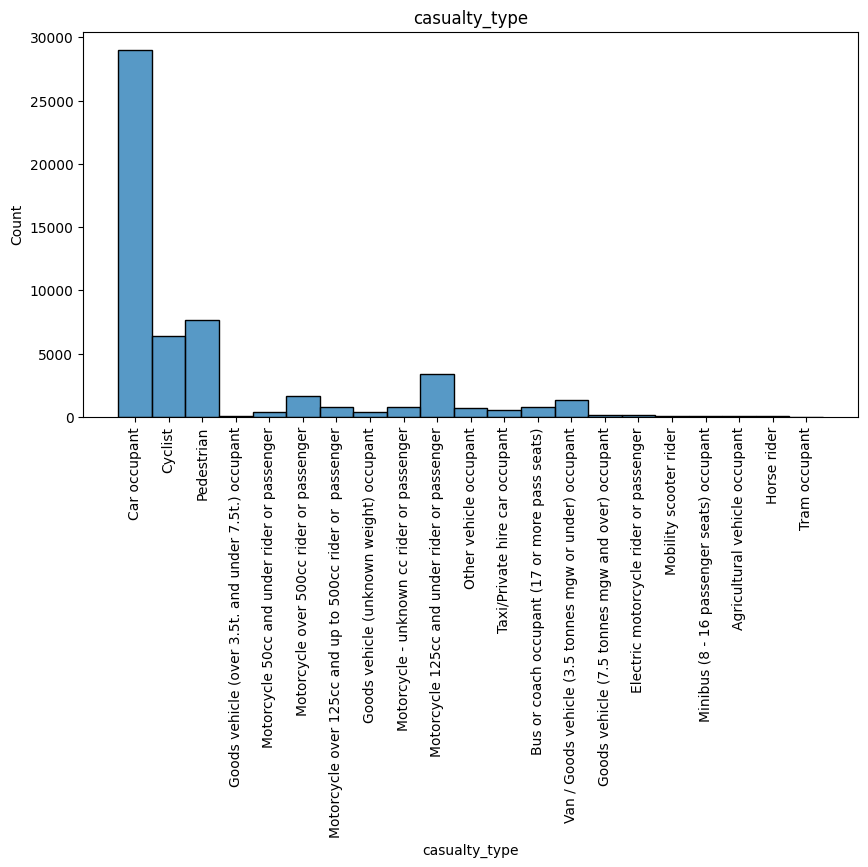

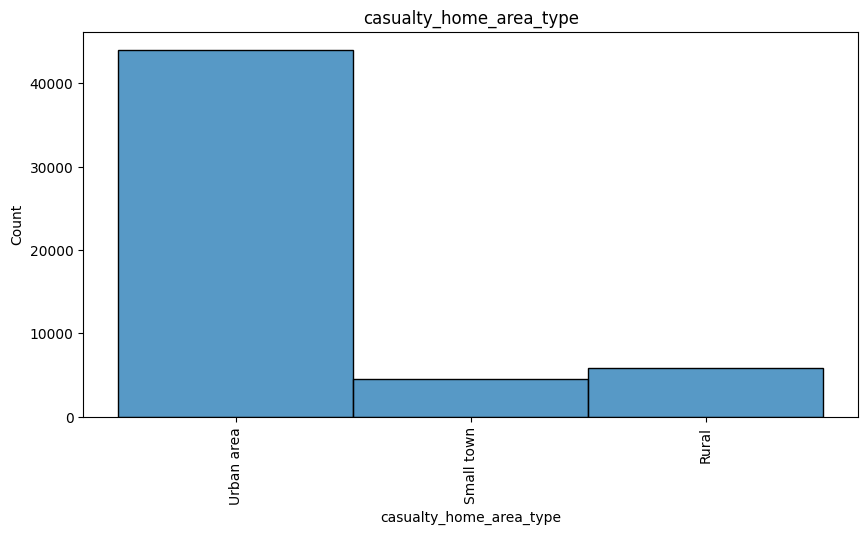

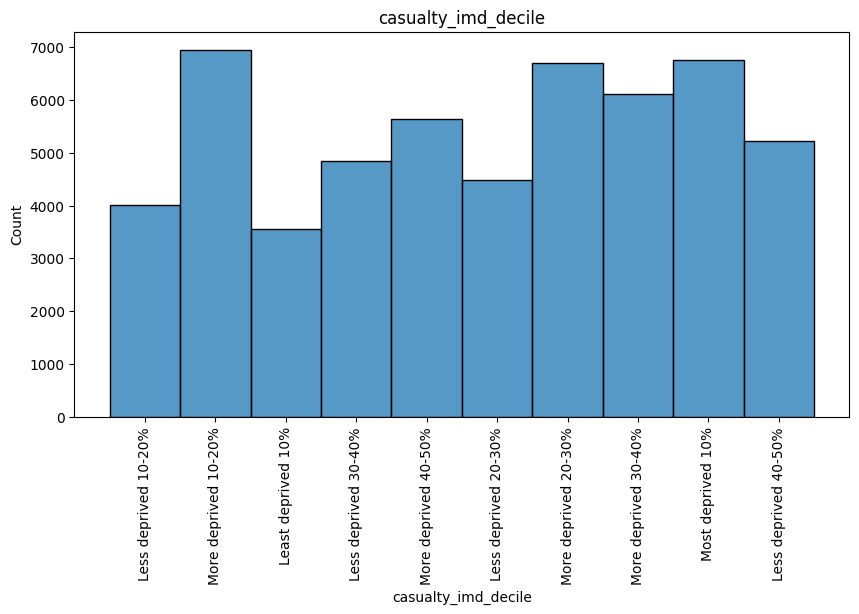

In [10]:
for col in df.columns:
    # common = df[col].value_counts().idxmax()
    # Map the description to the column
    if type(col_desc[col]) == dict:
        df[col] = df[col].map(col_desc[col])
    # Plot the distribution of each column
    plt.figure(figsize=(10,5))
    sns.histplot(df[col])
    plt.title(col)
    # Set the x-axis to be vertical
    plt.xticks(rotation=90)
    plt.show()
    # Find the most common value
    